# Title: What are the relationships between the suicide number and socio-demographic/ economic variables, in addition to assess whether is it possible to predict with these variables?

Student Number: 19113428 
\
Modules: CASA0006: Data Science for Spatial Systems - Coursework
\
GitHub: https://github.com/wingochau/DS_CW
\
Word Count: 2407

# 1. Introduction

Suicide is an important urban issue. A higher suicide rate could link to low productivity and instability of a country. In the globe, countries hold a different level of suicides number. It is interesting to analyse the relationships between various factors in a certain country and the possibility of predicting the suicide number by using socio-demographic variables such as age, gender, and economic factors such as GDP of the country.

# 2. Literature review

Scholars have been conducting research on suicide mortality. Värnik (2012) investigated the worldwide suicide data from 1950 to 2009 and discovered that the most serious places were concentrated in Western and Eastern Europe, but started shifting to Asia afterwards. The author also found that gender and age groups play a critical role in relation to suicide mortality. In which, European countries tended to have a higher rate in the 45-59 age group in male and female in South East Asia had the highest suicide rate among teenagers. Bertolote and Fleischmann (2002) further developed the distribution of suicide rate in 1998 by the age group in both genders. They concluded that it had an increasing trend with age, rose dramatically when aged at 75 or more.

Several papers investigated this urban issue from another perspective. They hypothesized that the differences could be due to development level. Suicide mortality not only varies across countries, but "even within the same region or at the similar levels of development" (Liu, 2009, p. 209). Vijaykumar (2007) also resulted in the same when investigating the suicide rate in India, the southern and northern states contributed a wide variation of suicide rates. The author supplemented with an opinion that it was not solely driven by cultural and individual factors, economic issues such as poverty, unemployment, and debts were associated with suicide mortality. The places with less wealth, it was likely to record a relatively higher suicide rate. It rose an awareness that the wealthiness of the country could be one of the influencing factors.

Among these scholars, they agreed the research gap was that many publications in analysing the suicides in the whole world were not comprehensive due to the lack of data. Another problem was that some results were produced by the data collected from a few countries only. For example, there were only 74 countries being counted in Bertolote and Fleischmann's research. It could lead to an inaccurate conclusion or pattern by not using a larger dataset with more countries. In addition, these papers solely provided the distribution of the data and some single correlation between variables. But in fact, a prediction might be able to visualise the trend and the seriousness of the increasing suicide rate. As such, this paper aims to fill this research gap and try to test the possibility of predicting it.

# 3. Research question

In order to fill the research gap, a data analysis on the suicide dataset will be conducted and the research question of this paper is: 
\
" What are the relationships between the suicide number and socio-demographic/ economic variables, in addition to assess whether is it possible to predict with these variables? "
\
For reaching this aim, there are four main objectives needed to be analysed:
1. Identifying the suicide number distribution in different countries
2. Analysing the correlations between variables 
3. Comparing the linear regression after VIF and the permutation feature importance
4. Investigating the possibility and effectiveness of prediction in different models

# 4. Methodology

The data selected for conducting this research is the Suicide Rates Overview 1985 to 2016 from Kaggle. The dataset is publicly shared on the GitHub link and free to reproduce. The data contains socio-demographic and economic variables in 101 countries as shown below:

In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import rfpimp
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from itertools import cycle
from sklearn.linear_model import lasso_path
from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection
from sklearn.model_selection import validation_curve

/opt/conda/envs/sds2020/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# Read the dataset
sui = pd.read_csv('https://raw.githubusercontent.com/wingochau/DS_CW/main/master.csv')
sui.head(2)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent


In [3]:
# Overview of the data
sui.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [4]:
sui['country'].nunique()

101

In order to achieve these four objectives, it is going to conduct an in-depth data analysis on this dataset. 

Data cleaning will be the first step. It includes transforming N/A values into zero integers and removing the comma in 'gdp_for_year'. After data cleaning, it will plot the distribution of the average suicide number per 100,000 population from 1985 to 2016. Choosing the suicide number per 100,000 population is for obtaining a more realistic result based on population. Since there are 101 countries in the dataset and it is difficult to plot all, it is going to plot a filtered average suicide number with more than 20 over the years. Additionally, it will rank the 'gdp_for_year' for all countries from poorer (lower values) to wealthier (higher values). This step is for achieving the first objective.

Secondly, a correlation matrix will be produced with the cleaned dataset. Starting from this step, the 'generation' column will be being removed. It is because only socio-demographic and economic variables are being considered in this research. Moreover, these categorical variables will be converted into 0 and 1. The index will be set as 'country' and the number of columns will increase to 13. 

Thirdly, a permutation feature importance graph and a linear regression with VIF will be produced with these processed variables. In terms of the permutation feature importance, the test size is set as 50% and trained by the random forest model with 50 estimators. The rationale for choosing this training model is because of the large data size (27820 rows), and the number of estimators is relatively low for faster data processing.
For the linear regression, 'year' and 'suicide_per_100k_pop' are removed because 'suicide_per_100k_pop' is assumed as the same nature with the suicide number and population. And the removal of 'year' is that the entire data analysis will be considered as the aggregate from 1985 to 2016. In relation to the VIF, the threshold is set as 1.5 as this value can eliminate the most highly correlated variables. With the results from this step, it will achieve the third research objective.

Finally, it will try to improve the prediction performance of the linear model with other complex models. Three main models will be applied to the dataset, including Lasso, Decision Tree, and Random Forest. Morever, it will optimise hyperparameters of the machine learning model through cross-validation. This step is going to achieve the final objective: Investigating the possibility and effectiveness of prediction in different models.

# 5. Results and Discussion

In [5]:
# Data Cleaning
sui_unclean = sui.iloc[:,0:12]
sui_unclean = sui_unclean.drop(['country-year'], axis=1)
sui_unclean.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [6]:
sui_clean = sui_unclean.fillna(0)
sui_clean.isnull().sum()

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
HDI for year          0
 gdp_for_year ($)     0
gdp_per_capita ($)    0
generation            0
dtype: int64

In [7]:
# Data Validation, changing the column names and symbols
sui_clean[' gdp_for_year ($) '] = sui_clean[' gdp_for_year ($) '].str.replace(',', '').astype(int)
sui_clean.rename(columns ={' gdp_for_year ($) ': 'gdp_for_year', 'suicides/100k pop': 'suicides_per_100k_pop', 'gdp_per_capita ($)': 'gdp_per_capita'}
           , inplace = True)
sui_clean.head(3)

,country,year,sex,age,suicides_no,population,suicides_per_100k_pop,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,0.0,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,0.0,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,0.0,2156624900,796,Generation X


In [8]:
# Calculating the average values and flitering the suicides number
sui_mean = sui_clean.groupby('country').agg({"suicides_per_100k_pop" : np.mean}) 
sui_mean = sui_mean.reset_index()
sui_mean_plot = sui_mean.loc[(sui_mean['suicides_per_100k_pop'] >= 20)]
sui_mean_plot

,country,suicides_per_100k_pop
6,Austria,23.759764
11,Belarus,31.075913
12,Belgium,21.237903
22,Croatia,22.835267
23,Cuba,21.222049
30,Estonia,27.276905
32,Finland,22.770431
33,France,21.675694
39,Guyana,22.186400
40,Hungary,32.761516


## 5.1 Result: Average suicide number per 100k population from 1985 to 2016

Figure 1a illustrates the average suicide number among all countries. It showed that the average suicide number presented a skewed right, most of the data hit on the range around 0 to 10.

Figure 1b represents the countries with the highest average suicide number per 100,000 population within 31 years. Lithuania was at the top with around 40 average suicide cases. The following were Sri Lanka and Russian Federation with approximately 35 cases. Surprisingly, there were more than 11 countries having an average of 25 suicide cases per 100,000 population among 101 countries in the dataset.

### 5.1.1 Discussion

The distribution indicates that most of the countries had a relatively low average suicide number per 100,000 population throughout the years. Whereas, for the outliers with the top three highest average suicide number, Sri Lanka and Lithuania were not a developed country (ranked 37 and 48 out of 101 countries). When an urban citizen has no capital to live or entertain, they are likely to lose their physiological and social needs in their life according to the Maslow's motivation theory. It is in line with the evidence that poverty could influence the number of suicide number (Vijaykumar, 2007). It will investigate the correlation between suicide number and GDP in the later analysis.

For Russian Federation, it was a highly developed country (ranked in 93). Despite economic factors, socio-demographic factors might be crucial such as gender and age. Watkins (2017) stated that there were 36 suicide cases per 100,000 males per year in Russia. Also, it mentioned that alcohol played an important role in Russia's suicide rate. In which, alcohol usually appears in adults (aged above 18-20). Thus, it has granted an additional insight to investigate the relationships with gender and age groups as well.

/opt/conda/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '$\\bf{Figure \\ 1a: The \\ distribution \\ of \\ average \\ suicides \\ per \\ 100k \\ population \\ from \\ 1985 \\ to \\ 2016}$')

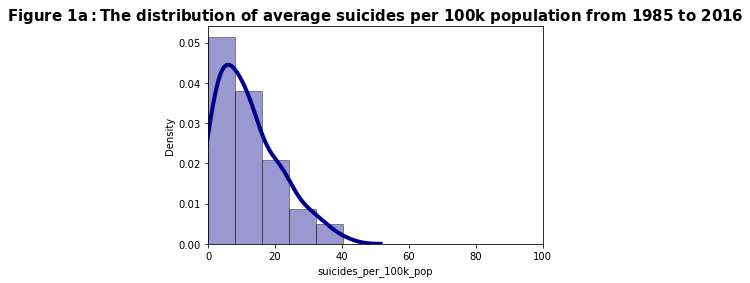

In [9]:
# Plotting the distribution of the average suicides_per_100k_pop for all countries
sns.distplot(sui_mean["suicides_per_100k_pop"], hist=True, kde=True, 
             bins=5, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             axlabel='suicides_per_100k_pop',
             kde_kws={'linewidth': 4})
sns.set(rc={'figure.figsize':(8.7,5.27)})
plt.xlim(0, 100)
plt.title(r"$\bf{" + 'Figure \ 1a: The \ distribution \ of \ average \ suicides \ per \ 100k \ population \ from \ 1985 \ to \ 2016' + "}$", 
          loc='center', fontsize= 15)

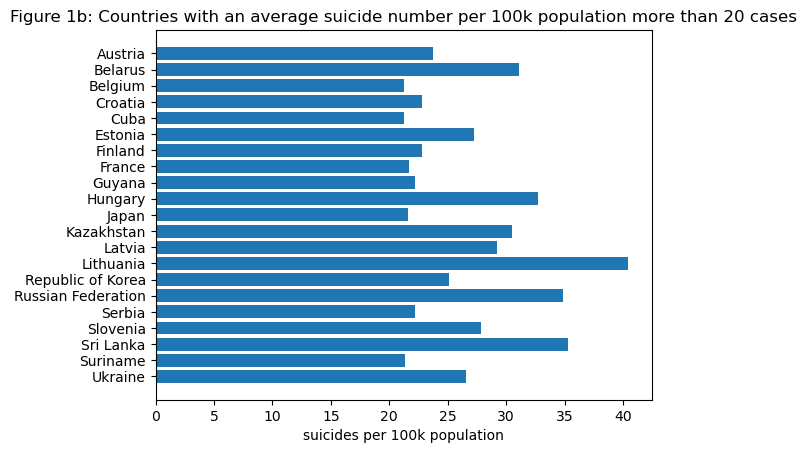

In [10]:
# Plotting the average suicides number per 100k population from 1985 to 2016
plt.rcdefaults()
fig, ax = plt.subplots()
y_pos = sui_mean_plot['country']
x_pos = sui_mean_plot['suicides_per_100k_pop']

ax.barh(y_pos, x_pos, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(y_pos)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('suicides per 100k population')
ax.set_title('Figure 1b: Countries with an average suicide number per 100k population more than 20 cases')

plt.show()

In [11]:
# Producing a rank for all countries based on GDP
sui_gdp_mean = sui_clean.groupby('country').agg({"gdp_for_year" : np.mean}) 
sui_gdp_mean['rank'] = sui_gdp_mean['gdp_for_year'].rank(method='max')
sui_gdp_mean['rank'] = sui_gdp_mean['rank'].astype(int) ## Coverting to integers
sui_gdp_mean = sui_gdp_mean.reset_index()
# Sorting countries with the top three highest average suicide number 
sui_gdp_mean[sui_gdp_mean['country'].isin(['Sri Lanka', 'Russian Federation', 'Lithuania'])]

,country,gdp_for_year,rank
52,Lithuania,2.771062e+10,48
75,Russian Federation,8.843229e+11,93
87,Sri Lanka,1.532645e+10,37


## 5.2 Result: Correlation Matrix

Figure 2 demonstrates the correlation between different pairs of variables. In specific to the suicide number, population and GDP for year were correlated with around 0.5. The rest of the variables recorded a relatively low correlation score. 'sex_female' and 'age_5-14_year' were negatively correlated with suicide number. 

### 5.2.1 Discussion

In line with the previous discussions and literature supporting, a populated and wealthy country is strongly associated with a higher suicide number. Matched examples include Lithuania and Russian. However, United States was managed well in the average suicide number while holding of these two features. One of the reasons could be education and offering sufficient mental supports, but these elements were not covered in the dataset and the research aim.
\
\
The female suicide and age group between 5-14 were not significantly related to the suicide number. At first, it may be due to the psychological gender differences. Females are likely to hold a more willingness in disclosing their emotions than males (Roy and Janal, 2005). For the younger age group, the negative correlation may be driven by supervision. It is because children are likely to have parents supervising their actions, leading to lowering the likeliness of suicide.
\
\
Among the predictors, 'population' also recorded a relatively high correlation score with 'gdp_for_year', 'gdp_per_capita' and 'sex_female'. It indicates multicollinearity. It could lead to unreliable coefficients of the predictors.

In [12]:
# Preparing a data for Regression
sui_reg = sui_clean.drop(['generation'], axis=1)
sui_reg = sui_reg.set_index('country')

# Converting categorical variables
sui_numeric = pd.get_dummies(sui_reg)
sui_numeric = sui_numeric.drop(['year', 'suicides_per_100k_pop'], axis = 1)
sui_numeric

,suicides_no,population,HDI for year,gdp_for_year,gdp_per_capita,sex_female,sex_male,age_15-24 years,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years
country,,,,,,,,,,,,,
Albania,21,312900,0.000,2156624900,796,0,1,1,0,0,0,0,0
Albania,16,308000,0.000,2156624900,796,0,1,0,0,1,0,0,0
Albania,14,289700,0.000,2156624900,796,1,0,1,0,0,0,0,0
Albania,1,21800,0.000,2156624900,796,0,1,0,0,0,0,0,1
Albania,9,274300,0.000,2156624900,796,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,107,3620833,0.675,63067077179,2309,1,0,0,0,1,0,0,0
Uzbekistan,9,348465,0.675,63067077179,2309,1,0,0,0,0,0,0,1
Uzbekistan,60,2762158,0.675,63067077179,2309,0,1,0,0,0,1,0,0


Text(0.5, 1.0, 'Figure 2: Correlation Matrix')

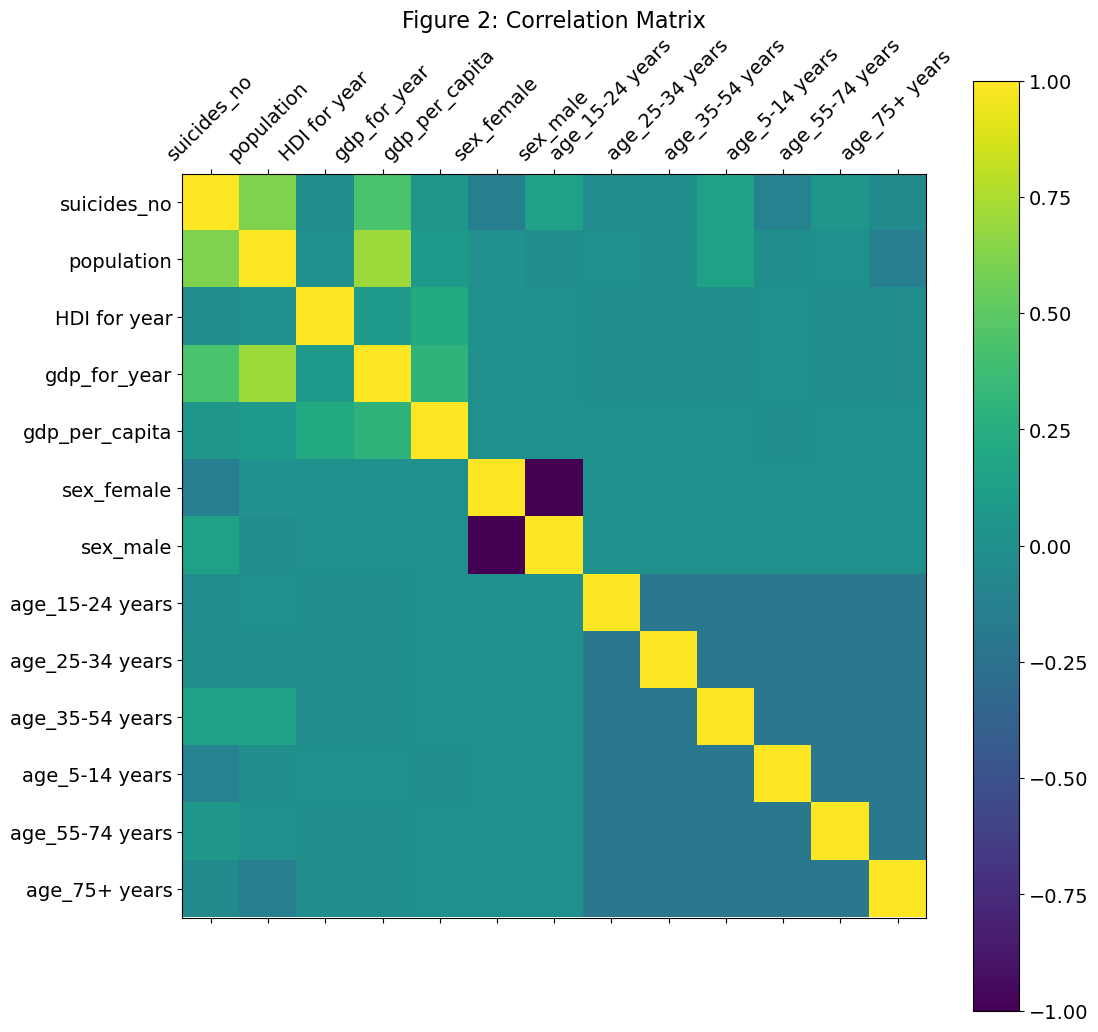

In [13]:
# Dealing with multicollinearity
df = sui_numeric
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(12, 12))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Figure 2: Correlation Matrix', fontsize=16)

## 5.3.1 Result: Permutation Feature Importance

Figure 3 shows the permutation feature importance with all the variables by random forest. Population contributed the most with more than 3 importance score, meanwhile the second largest score was around 0.5 (GDP for year). It had 6 times larger than the second important variable. It showed that population provided a large impact on the prediction on suicide number.

## 5.3.2 Result: VIF and Linear Regression

After conducting a VIF, 'sex_female' and 'gdp_for_year' were being removed and the maximum VIF was dropped to around 1.06. The performance of the linear regression with VIF predictors was relatively ineffective. It showed an R-Squared value of 0.421, which means that it only predicted the data with 42.1% accuracy.

### 5.3.3 Discussion

It found that population and GDP contributed the most in relation to the feature importance. It shows that populated places is likely to cause suicide. However, due to multicollinearity, the second important feature 'gdp_for_year' was being removed by VIF. It was likely because of the correlation between predictors (related to section 5.2.1).

In linear regression, 'sex_male' had the highest coefficient with around 273.3 among these variables. It means that an increase of males suicide by 1% increases the predicted suicide number by 273.4, when all other variables remain fixed. The t-value of this variable was around 33.21, which indicated that it rejected the null hypothesis.

In line with the discussion in the correlation matrix, an increase of suicides aged 5-14 by 1% decreases the predicted suicide number by 250 when all other variables remain fixed. The t-value of this variable was approximately around -10, indicating that there was no significant difference. 

'population' recorded a nearly 0 coefficient but with a t-value of 131.868. It indicates that population moved the same direction as the suicide number and the result was not by chance. 

A weak model performance is a vital signal (R-Squared: 0.421), indicating that the suicide number was not explaining effectively in the variation of these variables. The linear regression model gave too many biases to the performance. Whereas, in the permutation feature importance analysis, the model was using Random Forest instead of linear regression. Thus, it further indicates the needs of applying a suitable model for improving the data analysis.

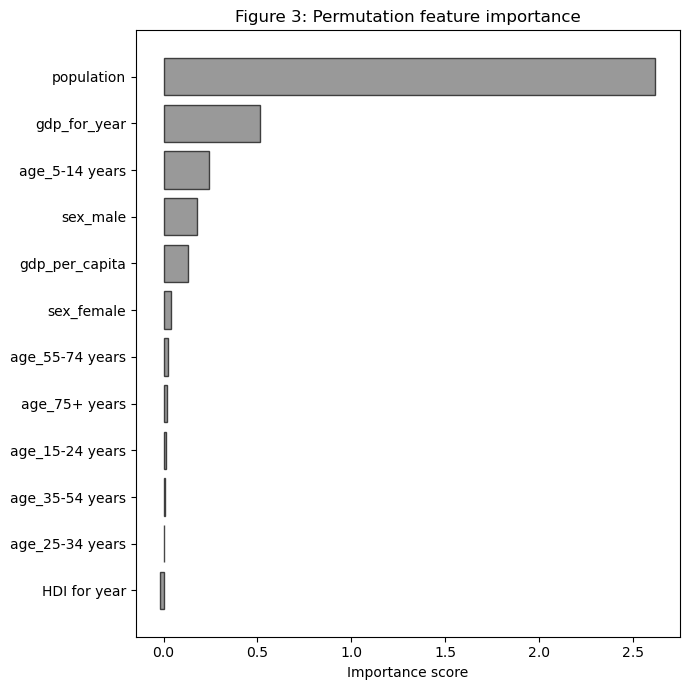

In [14]:
# Permutation Feature Importance


features = [ 'suicides_no','population' , 'HDI for year', 'gdp_for_year', 'gdp_per_capita',
           'sex_female', 'sex_male', 'age_15-24 years', 'age_25-34 years', 'age_35-54 years', 'age_5-14 years',
            'age_55-74 years', 'age_75+ years']

df_train, df_test = train_test_split(sui_numeric, test_size=0.50)
df_train = df_train[features]
df_test = df_test[features]

X_train, y_train = df_train.drop('suicides_no',axis=1), df_train['suicides_no']
X_test, y_test = df_test.drop('suicides_no',axis=1), df_test['suicides_no']

################################################ Train #############################################

rf = RandomForestRegressor(n_estimators=50, n_jobs=-1)
rf.fit(X_train, y_train)

############################### Permutation feature importance #####################################

imp = rfpimp.importances(rf, X_test, y_test)

############################################## Plot ################################################

fig, ax = plt.subplots(figsize=(7, 7))

ax.barh(imp.index, imp['Importance'], height=0.8, facecolor='grey', alpha=0.8, edgecolor='k')
ax.set_xlabel('Importance score')
ax.set_title('Figure 3: Permutation feature importance')
plt.gca().invert_yaxis()

fig.tight_layout()


In [15]:
# calculating VIF
# This function is amended from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, list_var_not_to_remove, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param list_var_not_to_remove: the list of variables that should not be removed even though it has a high VIF. For example, dummy (or indicator) variables represent a categorical variable with three or more categories.
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const').drop(list_var_not_to_remove)
        
        print('Max VIF:', vif_df.VIF.max())
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [16]:
# using VIF on the suicides dataset
predictors_sui = sui_numeric.drop('suicides_no', axis=1)
response_sui = sui_numeric['suicides_no']

list_var_not_to_remove = ['age_15-24 years', 'age_25-34 years', 'age_35-54 years', 'age_5-14 years',
       'age_55-74 years', 'age_75+ years']
df_predictors_select_VIF = drop_column_using_vif_(predictors_sui, list_var_not_to_remove, thresh=1.5)
print("The columns remaining after VIF selection are:")
print(df_predictors_select_VIF.columns)

/opt/conda/envs/sds2020/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/opt/conda/envs/sds2020/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Max VIF: inf
Dropping: sex_female
Max VIF: 2.399244380285396
Dropping: gdp_for_year


/opt/conda/envs/sds2020/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/opt/conda/envs/sds2020/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/opt/conda/envs/sds2020/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


Max VIF: 1.0564435922382118
The columns remaining after VIF selection are:
Index(['population', 'HDI for year', 'gdp_per_capita', 'sex_male',
       'age_15-24 years', 'age_25-34 years', 'age_35-54 years',
       'age_5-14 years', 'age_55-74 years', 'age_75+ years'],
      dtype='object')


/opt/conda/envs/sds2020/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [17]:
# Conduct a Linear Regression
lr = LinearRegression()
lr.fit(X=df_predictors_select_VIF, y=response_sui)

LinearRegression()

In [18]:
print('Constant term: ', lr.intercept_)
df_coef_lr_VIF = pd.DataFrame({"var": df_predictors_select_VIF.columns.values, "coef":lr.coef_})
print(df_coef_lr_VIF)

Constant term:  -153.86827531153799
               var        coef
0       population    0.000142
1     HDI for year  -66.513097
2   gdp_per_capita    0.000804
3         sex_male  273.384996
4  age_15-24 years  -70.583522
5  age_25-34 years    3.608876
6  age_35-54 years  108.457071
7   age_5-14 years -227.592019
8  age_55-74 years  107.611855
9    age_75+ years   78.497739


In [19]:
print('R2:')
lr.score(X=df_predictors_select_VIF, y=response_sui)

R2:


0.42104983574328925

In [20]:
# fit a lineare regression model using statsmodel
regressor_OLS = sm.OLS(endog=response_sui, exog=sm.add_constant(df_predictors_select_VIF)).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            suicides_no   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     2247.
Date:                Sun, 25 Apr 2021   Prob (F-statistic):               0.00
Time:                        14:48:02   Log-Likelihood:            -2.2118e+05
No. Observations:               27820   AIC:                         4.424e+05
Df Residuals:                   27810   BIC:                         4.425e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -131.8871      6.305    -20.919      0.000    -144.245    -119.529
population          0.0001   1.07e-06    131.868      0.000       0.000       0.000
HDI for year      -66.5131     11.718     -5.676      0.000     -89.482     -43.544
gdp_per_capita      0.0008      0.000      3.592      0.000       0.000       0.001
sex_male          273.3850      8.232     33.210      0.000     257.250     289.520
age_15-24 years   -92.5647      9.259     -9.998      0.000    -110.712     -74.417
age_25-34 years   -18.3723      9.258     -1.985      0.047     -36.518      -0.227
age_35-54 years    86.4759      9.391      9.208      0.000      68.069     104.883
age_5-14 years   -249.5732      9.285    -26.880      0.000    -267.772    -231.375
age_55-74 years    85.6307      9.260      9.247      0.000      67.481     103.781
age_75+ years      56.5166      9.322      6.063      0.000      38.245      74.788
==============================================================================
Omnibus:                    44805.676   Durbin-Watson:                   0.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         52828621.215
Skew:                          10.376   Prob(JB):                         0.00
Kurtosis:                     215.471   Cond. No.                     4.06e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.16e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## 5.4 Result: Comparing with other models

**Lasso**: These VIF variables did not perform effectively in the Lasso model. The model score was around 0.35, which is worse than the linear regression model. Most of the coefficient was nearly zero. Figure 4 demonstrates that the coefficient of all variables came to zero stably when the log alpha was 3 or more. It reflects that the model was not able to reflect the relationship between variables.
\
\
**Decision Tree**: This model showed a perfect prediction performance from these VIF variables, with a model score of 1. 
\
\
**Random Forest**: This model performed nearly a perfect prediction with around 96.77% accuracy when the number of estimators was 3. 

### 5.4.1 Discussion

By applying the VIF predictors and response to different models, Random Forest was relatively preferred. However, dividing predictors into subsets or combining their predictions led to overfitting problem on Rondom Forest and Decision Tree. It indicates that noises were substantial in the training data on these two models. Overfitting could lead to an impact on the model when new data is added.

Since Lasso is a type of linear regression, it can conclude that the suicide dataset cannot be predicted by linear models due to weak model performance. Reducing number of predictors brought a huge impact on explaining the data. Even multicollinearity was minimised, Lasso is not suitable for the dataset.

In [21]:
# Comparing with other models
# 1. Lasso
## increase the max_iter to guarantee convergence
lasso_model = linear_model.Lasso(max_iter=10e7, normalize=True)
lasso_model.fit(X=predictors_sui, y=response_sui)

Lasso(max_iter=100000000.0, normalize=True)

In [22]:
lasso_model.score(X=predictors_sui, y=response_sui)

0.3454648046622504

In [23]:
df_coef_lasso = pd.DataFrame({"var": predictors_sui.columns.values, "coef":lasso_model.coef_})
print(df_coef_lasso)

                var      coef
0        population  0.000099
1      HDI for year -0.000000
2      gdp_for_year  0.000000
3    gdp_per_capita  0.000000
4        sex_female -0.000000
5          sex_male  0.000000
6   age_15-24 years -0.000000
7   age_25-34 years  0.000000
8   age_35-54 years  0.000000
9    age_5-14 years -0.000000
10  age_55-74 years  0.000000
11    age_75+ years  0.000000


(-1.25, 4.25, -127.2042319629773, 602.2886354145268)

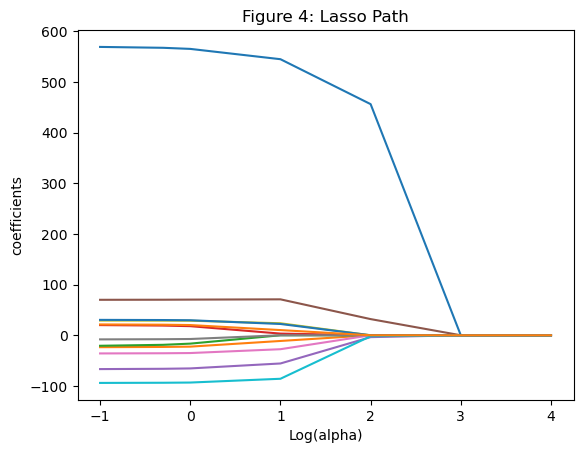

In [24]:
# Plotting the Lasso path
predictors_sui_standardised = predictors_sui/predictors_sui.std(axis=0)


alphas_lasso, coefs_lasso, _ = lasso_path(predictors_sui_standardised, response_sui.values.reshape(-1),alphas = [.1, .5, 1, 10, 100, 1000, 10000], fit_intercept=False)


log_alphas_lasso = np.log10(alphas_lasso)
for coef_l in coefs_lasso:
    l1 = plt.plot(log_alphas_lasso, coef_l)

plt.xlabel('Log(alpha)')
plt.ylabel('coefficients')
plt.title('Figure 4: Lasso Path')
plt.axis('tight')

In [25]:
# 2. Decision Tree
dec_tree = DecisionTreeRegressor(random_state=0)
dec_tree.fit(df_predictors_select_VIF, response_sui)

DecisionTreeRegressor(random_state=0)

In [26]:
print('The predicted score in Decision Tree on the data:')
print(dec_tree.score(X=df_predictors_select_VIF, y=response_sui))

The predicted score in Decision Tree on the data:
1.0


In [27]:
# 3. Random Forest
reg_random_forest = RandomForestRegressor(n_estimators=3, random_state=0)
reg_random_forest.fit(df_predictors_select_VIF, response_sui.values.reshape(-1))

RandomForestRegressor(n_estimators=3, random_state=0)

In [28]:
print('The predicted score in Random Forest on the data:')
print(reg_random_forest.score(X=df_predictors_select_VIF, y=response_sui))

The predicted score in Random Forest on the data:
0.9677484826204308


In [29]:
# Gathering the scores from all models
lasso = lasso_model.score(X=predictors_sui, y=response_sui)
dec_t = dec_tree.score(X=df_predictors_select_VIF, y=response_sui)
random_f = reg_random_forest.score(X=df_predictors_select_VIF, y=response_sui)

print('The predicted score in Lasso on the data:')
print(lasso)
print('The predicted score in Decision Tree on the data:')
print(dec_t)
print('The predicted score in Random Forest on the data:')
print(random_f)

The predicted score in Lasso on the data:
0.3454648046622504
The predicted score in Decision Tree on the data:
1.0
The predicted score in Random Forest on the data:
0.9677484826204308


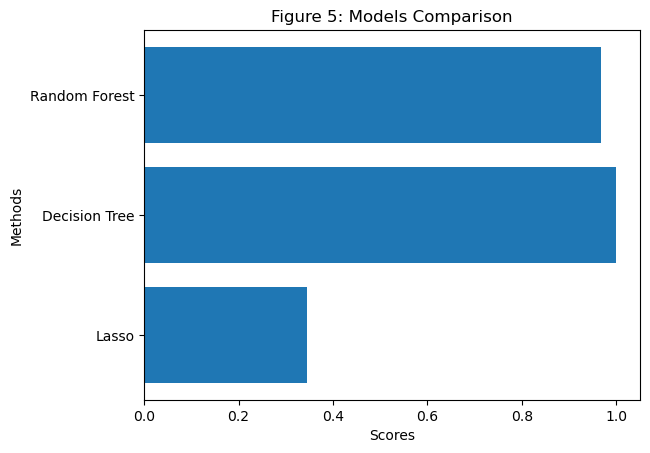

In [30]:
# Plotting the performance of these three models
Methods = ['Lasso','Decision Tree','Random Forest']
Scores = [lasso, dec_t, random_f]

plt.barh(Methods,Scores)
plt.title('Figure 5: Models Comparison')
plt.ylabel('Methods')
plt.xlabel('Scores')
plt.show()

## 5.5 Result: Optimising hyperparameters of the ML model

After training the VIF selected data, the performance of the training data maintained almost the same. However, the test data performed much ineffective on the Random Forest model. The score difference was around 10.
\
\
In the cross-validation, by using the training data, it gave an around 83% prediction accuracy stably between 10 and 100 trees.

### 5.5.1 Discussion

For the previous Random Forest model, there were too many noises in the training data. By using 5-folds cross-validation, the hyperparameters were optimised. 83% performance score provided adequate suitability and stability on unseen data to solve the previous overfitting problem. As a result, it reveals that the suicide dataset is possible to predict outstanding with these socio-demographic and economic variables. 
\
\
However, due to the hardware and time constraints, a larger number of estimator range and k-fold cannot be assessed. Moreover, 83% performance is not very impressive. The validation scores mean +/- standard deviation varied from around 70% to 90%, a large gap could lead to inaccuracy when processing on larger unseen data. But in overall, the prediction after 5-folds cross-validation is still statistically acceptable.

In [31]:
# Optimise hyperparameters of the ML model
# We apply train_test_split twice to obtain the three train, dev and test sets with half of the test size
X_train, X_test, y_train, y_test = train_test_split(df_predictors_select_VIF, response_sui, test_size=0.5, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=2020)

In [32]:
lr.fit(X_train,y_train)

LinearRegression()

In [33]:
print('The Linear Regression score on the training data:')
print(lr.score(X_train, y_train))
print('The Linear Regression score on the development data:')
print(lr.score(X_val, y_val))

The Linear Regression score on the training data:
0.4191281659039269
The Linear Regression score on the development data:
0.41451585161606996


In [34]:
rf = RandomForestRegressor(n_estimators=10)

In [35]:
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10)

In [36]:
print('The score on the training data:')
print(rf.score(X_train, y_train))
print('The score on the development data:')
print(rf.score(X_val, y_val))

The score on the training data:
0.9585579530883576
The score on the development data:
0.8145826842113086


In [37]:
# Cross Validation
parameters = {'n_estimators':[10,20,30,40,50,70,100]}
rf = RandomForestRegressor()

clf = model_selection.GridSearchCV(rf, parameters)

clf.fit(X_train, y_train)

# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clf.best_params_)
print ("The best score is: ")
print (clf.best_score_)

The best parameter value is: 
{'n_estimators': 40}
The best score is: 
0.8300395134532483


In [38]:
n_estimators_range = [10,20,30,40,50,70,100]

train_scores, valid_scores = validation_curve(estimator=RandomForestRegressor(), 
                                              X=X_train, y=y_train, 
                                              param_name="n_estimators",
                                              param_range=n_estimators_range,
                                              cv=5)

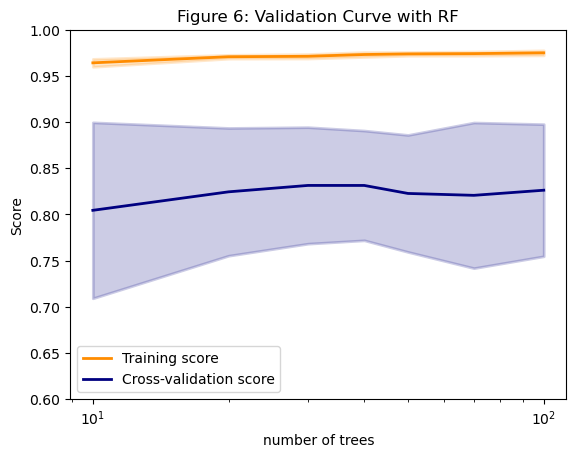

In [39]:
# plotting the validation curve
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.title("Figure 6: Validation Curve with RF")
plt.xlabel(r"number of trees")
plt.ylabel("Score")
plt.ylim(0.6, 1.0)
lw = 2
plt.semilogx(n_estimators_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(n_estimators_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(n_estimators_range, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(n_estimators_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

# 6. Conclusion

To sum up, the relationships between the suicide number and socio-demographic and economic variables from different countries are partially correlated. Population and GDP of the country reflected a high importance towards the suicide number. Whereas, due to multicollinearity, 'gdp_for_year' was being removed from the regression analysis. 

It found that these variables performed poorly in linear models, indicating that they have a weaker linear relationship with the suicide number. Random Forest was the relatively better option for prediction but still experiencing a high bias issue. After conducting 5-folds cross-validation, using 100 estimators was able to stably provide an approximately 83% performance of the prediction on Random Forest. Therefore, with these socio-demographic and economic variables, it is possible to predict the suicide number with acceptable results.

# 7. Bibliography

Bertolote, J. M. and Fleischmann, A. (2002) ‘Suicide and psychiatric diagnosis: a worldwide perspective.’, World psychiatry : official journal of the World Psychiatric Association (WPA), 1(3), pp. 181–5. Available at: http://www.ncbi.nlm.nih.gov/pubmed/16946849 (Accessed: 16 April 2021).
\
\
Liu, K. (2009) ‘Suicide Rates in the World: 1950–2004’, Suicide and Life-Threatening Behavior, 39(2), pp. 204–213. doi: 10.1521/suli.2009.39.2.204.
\
\
Roy, A. and Janal, M. (2005) ‘Family history of suicide, female sex, and childhood trauma: separate or interacting risk factors for attempts at suicide?’, Acta Psychiatrica Scandinavica, 112(5), pp. 367–371. doi: 10.1111/j.1600-0447.2005.00647.x.
\
\
Värnik, P. (2012) ‘Suicide in the world’, International Journal of Environmental Research and Public Health, 9(3), pp. 760–771. doi: 10.3390/ijerph9030760.
\
\
Vijaykumar, L. (2007) ‘Suicide and its prevention: The urgent need in India’, Indian Journal of Psychiatry, 49(2), p. 81. doi: 10.4103/0019-5545.33252.
\
\
Watkins, J. (2017) ‘The Story Behind Russia’s Male Suicide Problem - OZY | A Modern Media Company’, OZY, 18 April. Available at: https://www.ozy.com/around-the-world/the-story-behind-russias-male-suicide-problem/76845/ (Accessed: 24 April 2021).